In [2]:
import cv2
import plotly.express as px
import plotly.graph_objects as go
from torchviz import make_dot
import torch
import torch.nn as nn

In [3]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Sequential()

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        identity = self.shortcut(identity)

        out += identity
        out = self.relu(out)

        return out

In [4]:
class ParallelResidualBlockCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(ParallelResidualBlockCNN, self).__init__()

        self.branch1 = nn.Sequential(
            ResidualBlock(3, 16),
            ResidualBlock(16, 32)
        )

        self.branch2 = nn.Sequential(
            ResidualBlock(3, 16),
            ResidualBlock(16, 32)
        )

        self.branch3 = nn.Sequential(
            ResidualBlock(3, 16),
            ResidualBlock(16, 32)
        )

        self.branch4 = nn.Sequential(
            ResidualBlock(3, 16),
            ResidualBlock(16, 32)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(32 * 4, num_classes)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x4 = self.branch4(x)

        x = torch.cat((x1, x2, x3, x4), dim=1)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

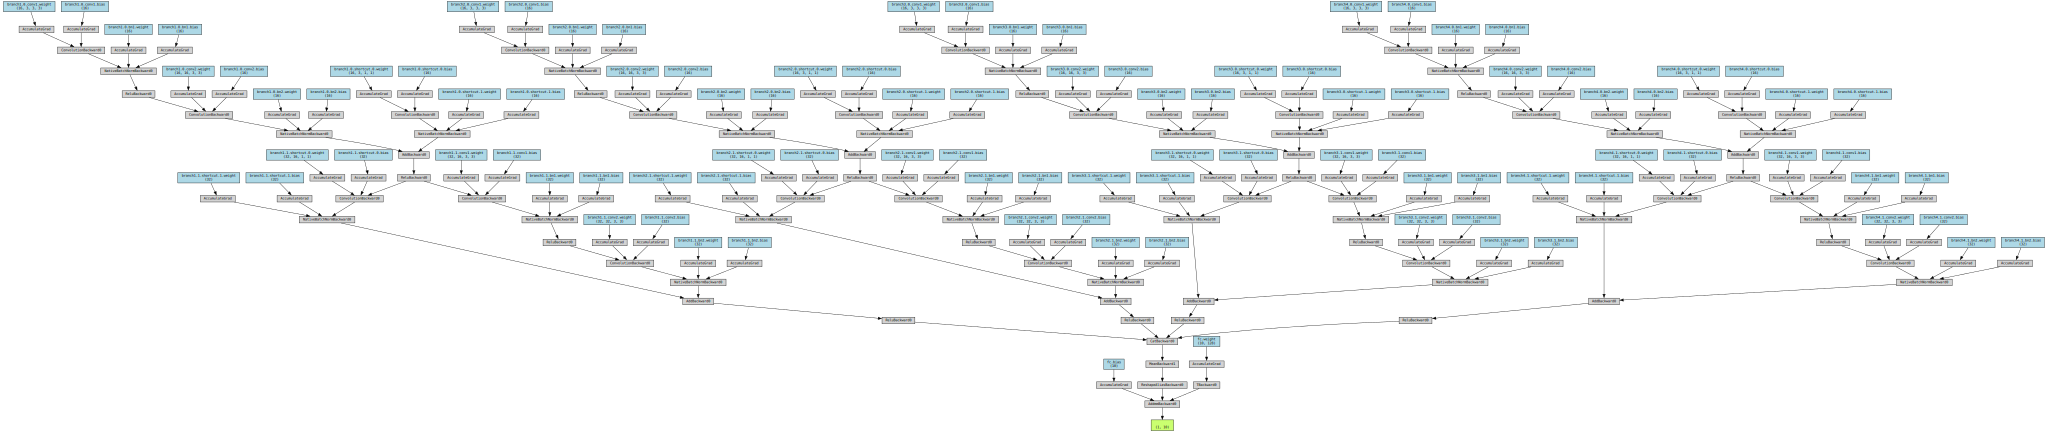

In [5]:
model = ParallelResidualBlockCNN()
make_dot(model(torch.randn(1, 3, 32, 32)), params=dict(model.named_parameters()))

In [6]:
img1_path = '/home/smbh/Projects/breast_cancer/data/raw/2.jpg'
img2_path = '/home/smbh/Projects/breast_cancer/data/raw/3.jpg'
# read images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
# convert to 

: 